# Representación gráfica de la solución

## 1. ¿Cómo se mueve un péndulo?


> Se dice que un sistema cualquiera, mecánico, eléctrico, neumático, etc., es un oscilador armónico si, cuando se deja en libertad fuera de su posición de equilibrio, vuelve hacia ella describiendo oscilaciones sinusoidales, o sinusoidales amortiguadas en torno a dicha posición estable.
- https://es.wikipedia.org/wiki/Oscilador_armónico

**Referencias**:
   - http://matplotlib.org
   - https://seaborn.pydata.org
   - http://www.numpy.org
   - http://ipywidgets.readthedocs.io/en/latest/index.html
   
**En realidad esto es el estudio de oscilaciones.**
___
 <div>
<img style="float: left; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/4c/Wide_Field_Imager_view_of_a_Milky_Way_look-alike_NGC_6744.jpg/712px-Wide_Field_Imager_view_of_a_Milky_Way_look-alike_NGC_6744.jpg" width="400px" height="200px" />
 </div>

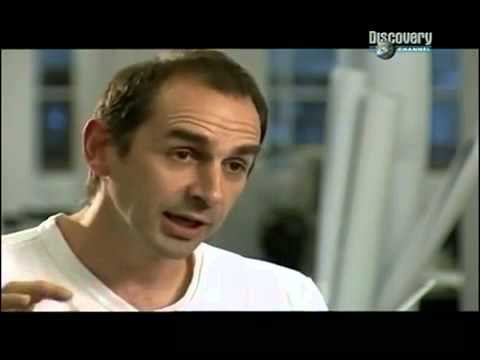

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('k5yTVHr6V14')

Los sistemas mas sencillos a estudiar en oscilaciones son el sistema masa-resorte y el péndulo simple.

<div>
<img style="float: left; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/7/76/Pendulum.jpg" width="220px" height="150px" />
<img style="float: right; margin: 15px 15px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/ko/9/9f/Mass_spring.png" width="260px" height="120px" />
</div>

\begin{align}
\frac{d^2 x}{dt^2} +  \omega_{0}^2 x &= 0, \quad\mbox{donde} \quad \omega_{0} = \sqrt{\frac{k}{m}}\notag\\
\frac{d^2 \theta}{dt^2} + \omega_{0}^{2}\, \theta &= 0, \quad\mbox{donde}\quad \omega_{0}^2 = \frac{g}{l}
\end{align}

## Solución en el tiempo
El modelo del sistema `masa-resorte` está descrito por la siguiente **ecuación diferencial**:

\begin{equation}
\frac{d^2x}{dt^2} + \frac{k}{m}x = 0,
\end{equation}

cuya solución se escribe como
\begin{equation}
x(t) = A \cos(\omega_{o} t) + B \sin(\omega_{o} t)
\end{equation}
Y su primera derivada (velocidad) sería
\begin{equation}
v(t) = \frac{dx(t)}{dt} = \omega_{0}[- A \sin(\omega_{0} t) + B\cos(\omega_{0}t)]
\end{equation}

**¿Cómo se ven las gráficas de $x$ vs $t$ y $\frac{dx}{dt}$ vs $t$?**

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Definimos la solución para la posición y velocidad
A=1 # Parámetro dependiente de la condición inicial de la posición
B=1 # Parámetro dependiente de la condición inicial de la velocidad

def pos(t,w0):
  return A*np.cos(w0*t)+B*np.sin(w0*t)
def vel(t,w0):
  return w0*(-A*np.sin(w0*t)+B*np.cos(w0*t))

In [ ]:
# plt.legend?

'''
        ==================   =============
        Location String      Location Code
        ==================   =============
        'best' (Axes only)   0
        'upper right'        1
        'upper left'         2
        'lower left'         3
        'lower right'        4
        'right'              5
        'center left'        6
        'center right'       7
        'lower center'       8
        'upper center'       9
        'center'             10
        ==================   =============
'''

In [ ]:
W0=np.linspace(0.1,5,10)
t=np.linspace(0,10,1000)

fig=plt.figure()
fig.suptitle('Sistema masa-resorte')

# Para la posición
ax=fig.add_subplot(211)
for w0 in W0:
  ax.plot(t,pos(t,w0),label='$\omega_0={}$'.format(round(w0,2)))
plt.legend(loc=10,bbox_to_anchor=(1.15,0))
ax.set_title('Posicón')
plt.grid()
ax.label_outer()

# Para la velocidad
ax=fig.add_subplot(212)
for w0 in W0:
  ax.plot(t,vel(t,w0))
ax.set_title('Velocidad')
plt.grid()

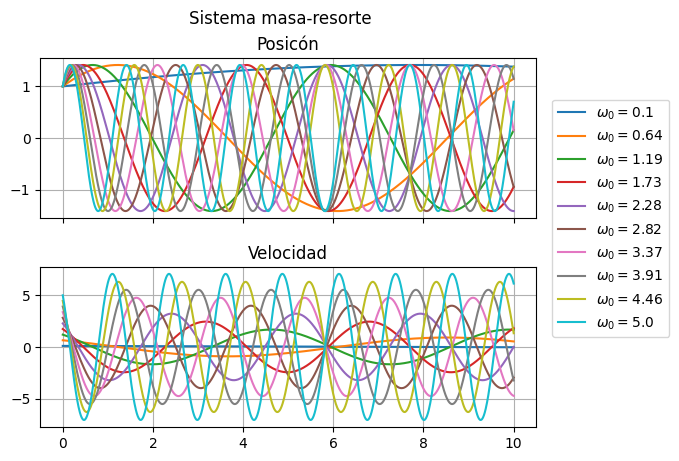

In [33]:
# Para especificar la posición de los subgráficos

fig=plt.figure()
fig.suptitle('Sistema masa-resorte')
gs=fig.add_gridspec(2,1,hspace=0.3)
ax=gs.subplots()

# Para la posición
for w0 in W0:
  ax[0].plot(t,pos(t,w0),label='$\omega_0={}$'.format(round(w0,2)))
ax[0].legend(loc=10,bbox_to_anchor=(1.15,0))
ax[0].set_title('Posicón')
ax[0].grid()
ax[0].label_outer() # Para mostrar solo etiquetas externas

# Para la velocidad
for w0 in W0:
  ax[1].plot(t,vel(t,w0))
ax[1].set_title('Velocidad')
ax[1].grid()

**Plano de fase**

In [ ]:
for w0 in W0:
  plt.plot(pos(t,w0),vel(t,w0),lw=1)
plt.axis('equal')
plt.grid()

In [ ]:
# Diferentes condiciones iniciales para w0=1
A_lista=np.linspace(0.1,5,10)
for A in A_lista:
  plt.plot(pos(t,1),vel(t,1))
plt.axis('equal')
plt.grid()

Y si consideramos un conjunto de frecuencias de oscilación, entonces

In [ ]:
# :)

Trayectorias del oscilador armónico simple en el espacio fase $(x,\, \dot{x})$.

## Gráfico interactivo
La posición y velocidad para el sistema `masa-resorte` se escriben como:
\begin{align}
x(t) &= x(0) \cos(\omega_{0} t) + \frac{\dot{x}(0)}{\omega_{0}} \sin(\omega_{0} t)\\
\dot{x}(t) &= -\omega_{0}x(0) \sin(\omega_{0} t) + \dot{x}(0)\cos(\omega_{0}t)
\end{align}

Importemos la clase `interact` e `interact_manual`

In [39]:
from ipywidgets import *

In [40]:
# interact?

In [43]:
# Usando 'interact' como función
#
def funcion(w0,x0,v0):
  x=x0*np.cos(w0*t)+v0/w0*np.sin(w0*t)
  v=-w0*x0*np.sin(w0*t)+v0*np.cos(w0*t)
  plt.plot(x,v)
  plt.axis([-10,10,-10,10])
  plt.grid()
  plt.show()
interact(funcion,w0=(0.1,5,0.1),x0=(0.1,5,0.1),v0=fixed(1))

interactive(children=(FloatSlider(value=2.5000000000000004, description='w0', max=5.0, min=0.1), FloatSlider(v…

<function __main__.funcion(w0, x0, v0)>

**Actividad:** Crear un gráfico interactivo para variar la posición inicial $\dot x_0$ y la frecuencia fundamental $\omega_0$, para la velocidad del sistema `masa-resorte`.

## Animación
importemos ahora la función `FuncAnimation` del paquete `matplotlib.animation`

**Animación del péndulo.**

La solución para el sistema reducido del `péndulo` es

\begin{align}
\theta(t) &= \theta(0) \cos(\omega_{0} t) + \frac{\dot{\theta}(0)}{\omega_{0}} \sin(\omega_{0} t)\\
\dot{\theta}(t) &= -\omega_{0}\theta(0) \sin(\omega_{0} t) + \dot{\theta}(0)\cos(\omega_{0}t).
\end{align}

Las posiciones $x$ y $y$ se obtienen de la descomposición entre la longitud y el ángulo:

\begin{align}
x &= l \sin(\theta), \quad
y = -l \cos(\theta) .
\end{align}

Animación del sitema masa-resorte